In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

 ## Problem 1. Minimizing f(x) = cos(x)
 
 First we will try to minimize $f(x) = cos (x)$
 
 For finding majorizer, use Taylor series expansion around $x_{n}$ as:
 
 $$f(x) = cos(x_{n}) - sin(x_{n})(x-x_{n}) + \frac{1}{2}(x-x_{n})^{2}cos(x_{n})$$
 
 But, $ |cos(x)| \le 1$. So, we can wrIte Majorizer as:
 
 $$g(x|x_{n}) = cos(x_{n}) - sin(x_{n})(x-x_{n}) + \frac{1}{2}(x-x_{n})^{2}$$
 
 Diff wrt to $x$ yields following majorizer update:
     $$ x_{n+1} = x_{n} + sin(x_{n})$$

In [8]:
x_n = 0.1; ##Notice on taking x_n zero, the objective function doesn't moves
for i in range(10):
    x_n = x_n + np.sin(x_n)
    print(f"x, cos(x) after {i} iteration: {x_n} , {np.cos(x_n)}")

x, cos(x) after 0 iteration: 0.19983341664682816 , 0.9800996592459544
x, cos(x) after 1 iteration: 0.39833948190923774 , 0.9217063600781894
x, cos(x) after 2 iteration: 0.7862278496020768 , 0.7065198611335216
x, cos(x) after 3 iteration: 1.4939210640840792 , 0.07679956543373839
x, cos(x) after 4 iteration: 2.4909676160309724 , -0.7957053788362126
x, cos(x) after 5 iteration: 3.0966514857940024 , -0.9989903156747445
x, cos(x) after 6 iteration: 3.1415775271071915 , -0.9999999998855947
x, cos(x) after 7 iteration: 3.1415926535897927 , -1.0
x, cos(x) after 8 iteration: 3.141592653589793 , -1.0
x, cos(x) after 9 iteration: 3.141592653589793 , -1.0


## Problem 2. Finding Sample Median 

The sample Median of $y_{1},y_{2},..., y_{n}$ minimizes the objective function

$$ f(\theta) =  \sum_{i=1}^{n} |y_{i} - \theta| $$

[The majorizer is ](https://www.stat.berkeley.edu/~aldous/Colloq/lange-talk.pdf):

$$ h(\theta | \theta_{n}) = \frac{1}{2} \sum_{i=1}^{n} \frac{(y_{i} - \theta)^{2}}{|y_{i} - \theta_{n}|} +  \frac{1}{2}|y_{i} - \theta_{n}| $$

Differentiating wrt. to $\theta$ we find the MM update:

$$ \theta_{n+1} = \frac{  \sum_{i=1}^{n} y_{i}w_{in} }{ \sum_{i=1}^{n} w_{in}} $$

where $$w_{in} = \frac{1}{|y_{i}- \theta_{n}|}$$

Thus, outline of MM algorithm:

1) Initialize a feasible value of $ \theta $

Repeat 2,3 for n iterations

2) Calculate $w_{in}$ using current $ \theta $ 

3) Update $ \theta $



In [54]:
y = np.random.randint(0,100,50)
median = np.median(y)
print(median)

47.0


In [55]:
## Median Using MM algorithm
theta = np.random.choice(y)  ## Randomly select one pivot
w_in = np.ones(y.shape[0])  
eps =0.1
for i in range(25):
    w_in = 1/np.abs((y-theta +eps ))
    theta =  np.dot(y,w_in)/ np.sum(w_in)
    print(f"Value of Median after {i} iterations: {theta}, Actual Median {median}")

Value of Median after 0 iterations: 51.816312331140395, Actual Median 47.0
Value of Median after 1 iterations: 51.53167519964499, Actual Median 47.0
Value of Median after 2 iterations: 51.153597042437404, Actual Median 47.0
Value of Median after 3 iterations: 50.70464479441165, Actual Median 47.0
Value of Median after 4 iterations: 50.2120092091944, Actual Median 47.0
Value of Median after 5 iterations: 49.707154618388635, Actual Median 47.0
Value of Median after 6 iterations: 49.23971977631797, Actual Median 47.0
Value of Median after 7 iterations: 48.95494156819848, Actual Median 47.0
Value of Median after 8 iterations: 48.854941568198484, Actual Median 47.0
Value of Median after 9 iterations: 48.754941568198475, Actual Median 47.0
Value of Median after 10 iterations: 48.654941568198474, Actual Median 47.0
Value of Median after 11 iterations: 48.55494156819847, Actual Median 47.0
Value of Median after 12 iterations: 48.45494156819847, Actual Median 47.0
Value of Median after 13 itera

In [34]:
theta

102.20135415698844

## Problem 3. Logistic Regression

Following the tutorial on [Logistic Regression](http://www.haowulab.org/teaching/statcomp/Notes/Lecture5_MM.pdf):

We get MM algorithm for weight update as:
    $$ \theta_{k+1} = \theta_{k}  - 4(X^{T}X)^{-1}X^T(Y- \pi(\theta_{k})) $$

where
     $$ \pi(\theta_{k}) =  \Bigg[ \frac{exp(\theta_{k}^{T}x_{1})}{1+ exp(\theta_{k}^{T}x_{1})} , \frac{exp(\theta_{k}^{T}x_{2})}{1+ exp(\theta_{k}^{T}x_{2})} ..... \frac{exp(\theta_{k}^{T}x_{n})}{1+ exp(\theta_{k}^{T}x_{n})} \Bigg]^{T} $$

Note Here X is matrix with columns of extra ones

In [3]:
iris = datasets.load_iris()

In [925]:
iris_labels = iris.target

In [926]:
## Take only the last two classes
from sklearn.model_selection import train_test_split

## These two will be used by SKlearn 
iris_data = iris.data[iris_labels != 2]
iris_labels = iris.target[iris_labels != 2]

In [927]:
## X,Y will be used by MM Algorithm

X =  np.append(np.ones((iris_data.shape[0],1)), iris_data, axis = 1)
Y =  iris_labels.copy()
#Y[Y==2] = 0
#iris_labels[iris_labels==2] = 0


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
iris_train,iris_test,iris_label_train,iris_label_test = train_test_split(iris_data,iris_labels, test_size = 0.3)


X_train.shape,Y_train.shape
iris_train.shape, iris_label_train.shape

((70, 4), (70,))

In [928]:
## MM Algorithm
theta = np.zeros(5)
pi_theta = np.ones(Y_train.shape[0])
XtX_inv = np.linalg.inv(np.matmul(X_train.T,X_train))
print(theta.shape,XtX_inv.shape,pi_theta.shape)

for i in range(20):
    exp =  np.exp(np.dot(X_train,theta))
    pi_theta = exp/(1+exp)
    a = np.matmul(XtX_inv,X_train.T)
    theta += 4*np.dot(a, (Y_train-pi_theta))

(5,) (5, 5) (70,)


In [929]:
theta

array([ 1.3794893 , -0.40914724, -2.00538376,  1.61878009,  3.14286183])

In [930]:
exp =  np.exp(np.dot(X_test,theta))
predict =  exp/(1+exp)
predict[predict > 0.5] = 1
predict[predict <0.5] = 0

In [931]:
sum(predict == Y_test)/len(Y_test)

1.0

In [932]:
## Comparison to Logistic Regression of Scikitlearn

In [933]:
from sklearn.linear_model import LogisticRegression

In [934]:
clf = LogisticRegression().fit(iris_train,iris_label_train)

In [935]:
clf.score(iris_test,iris_label_test)

1.0

In [936]:
clf.coef_

array([[-0.39044603, -1.35209888,  2.05327357,  0.88467823]])

In [938]:
clf.intercept_

array([-0.26237747])

## Problem 4 Support Vector Machine with Hinge Loss

The SVM with hinge loss is given by:

Carrying out further update as in Homework 2, we get update:

$$ w^{k+1} = \frac{C}{2} \big( I_{\alpha} + \frac{C}{2} \sum_{i=1}^{n} \frac{x_{i}x_{i}^{T}}{u_{i}} \big)^{-1} \big( \sum_{i=1}^{n}  x_{i} y_{i}  \frac{(1+u_{i})}{u_{i}} \big)$$


where m = dimension of w wihout appending for bias

   
   $$ I_d = diag[1,1,1,1,1..(m \; times)...., 0] $$
   $$ u_{i} = \big| 1 - y_{i}(w^{k})^{T} x_{i}) \big|$$

In [7]:
iris = datasets.load_iris()

In [8]:
iris_labels = iris.target

In [9]:
iris_data = iris.data[iris_labels != 1]
iris_labels = iris.target[iris_labels != 1]
X =  np.append(np.ones((iris_data.shape[0],1)), iris_data,axis = 1)
Y =  iris_labels.copy()
Y[Y==0]= 1
iris_labels[iris_labels==0] = 1
Y[Y==2] = -1
iris_labels[iris_labels==2] = -1
print(X.shape)
print(Y.shape)

(100, 5)
(100,)


In [10]:
C = 2

In [11]:
def calculate_loss(w,X,Y,C):
    l = 0
    l += 0.5*np.dot(w[0:-1],w[0:-1])
    p = 1-np.matmul(X,w)*Y
    p[p<0] = 0
    l += C*sum(p)
    return l
    

### MM Algorithm

In [17]:

w = np.random.rand(5) ## one extra
u_t = np.zeros(X.shape[0])
C = C/2
eps = 1e-8


I = np.eye(5)
I[4][4] = 0

loss = []
loss.append(calculate_loss(w,X,Y,2*C))

for i in range(50):
    u_t = np.abs(1- Y*np.matmul(X,w))
    u_t[u_t < eps] = eps
    p_t = 1/u_t
    
    xtx = np.zeros((5,5))
    for i in range(100):
        xtx += np.outer(X[i],X[i])*p_t[i]

    xtx = np.linalg.inv(I + C*xtx)
    
    xty = np.zeros(5)
    for i in range(X.shape[0]):
        xty += X[i]*Y[i]*(1+u_t[i])*p_t[i]
    
    xty = C*xty
    
    
    w = np.matmul(xtx, xty)
    l = calculate_loss(w,X,Y,eps)
    loss.append(l) ##Note at top we have divided C by 2

In [18]:
w

array([ 0.16772166,  0.74470814,  0.61371842,  0.02880505, -8.47560827])

In [19]:
loss

[283.560448792403,
 2.0357017897258665,
 1.179524412329464,
 0.9809238181471394,
 0.9162948408693476,
 0.8832166957688751,
 0.8586213229700801,
 0.8368992544043192,
 0.8165976986339393,
 0.7973045150520421,
 0.7788783384727784,
 0.761251655701456,
 0.7443792035798761,
 0.7282241983335807,
 0.7127546227583273,
 0.6979422623613951,
 0.6837625515933823,
 0.6701947270798794,
 0.6572221786448096,
 0.6448330038199923,
 0.633020809039306,
 0.6217858072387636,
 0.6111362285580713,
 0.6010899362351965,
 0.5916758074545119,
 0.582933705469718,
 0.5749105918087324,
 0.5676490381295859,
 0.5611656522370522,
 0.5554250950907593,
 0.5503282702364204,
 0.5457319637864937,
 0.5414900758607673,
 0.5374861477357555,
 0.5336418407973595,
 0.5299094009304228,
 0.5262607585744281,
 0.5226792599153356,
 0.5191546797959411,
 0.5156804750593467,
 0.5122522906353604,
 0.508867120527187,
 0.5055228047417822,
 0.5022177754098072,
 0.4989507571207503,
 0.4957207925271568,
 0.49252701409623695,
 0.4893687237664176

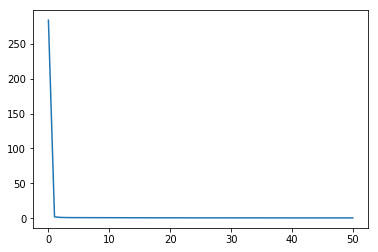

In [20]:
plt.plot(loss)

In [21]:
predict =  np.dot(X,w)
predict[predict >= 0] = 1
predict[predict <0] = -1

In [22]:
sum(predict == Y)

100

In [23]:
w

array([ 0.16772166,  0.74470814,  0.61371842,  0.02880505, -8.47560827])